# Nifty-50 (NSEI) DATA ANALYSIS

Historical data of the Nifty 50 index is an essential financial instrument for many investors and analysts. It provides valuable insights into the past performance of the index, allowing for trend analysis, pattern recognition, and the development of trading strategies. 
This data typically includes daily, weekly, or monthly price information, as well as volume traded, open, high, low, and close prices for each time period.


# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
import datetime as dt

# Importing Nifty-50 dataset
Dataset from May 2009- May 2024 is used of National Stock Exchange of India (NSEI), the leading stock exchange of India

In [5]:
df = pd.read_csv('/home/hp/Desktop/github_gssoc/^NSEI.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-12,3554.649902,3691.649902,3534.199951,3681.100098,3681.100098,0.0
1,2009-05-13,3668.750000,3709.600098,3610.199951,3635.250000,3635.250000,0.0
2,2009-05-14,3631.899902,3631.899902,3537.600098,3593.449951,3593.449951,0.0
3,2009-05-15,3597.850098,3686.250000,3597.850098,3671.649902,3671.649902,0.0
4,2009-05-18,3673.149902,4384.299805,3673.149902,4323.149902,4323.149902,0.0


In [7]:
data_types = df.dtypes

In [8]:
print(data_types)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


In [9]:
df = df.dropna()

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3.681000e+03
mean,10134.996049,10186.153749,10068.158183,10128.536203,10128.536203,2.231160e+05
std,4796.005014,4810.427223,4773.037874,4792.914078,4792.914078,2.100143e+05
min,3554.649902,3631.899902,3534.199951,3593.449951,3593.449951,0.000000e+00
25%,5900.200195,5927.299805,5863.950195,5898.850098,5898.850098,0.000000e+00
50%,8711.200195,8745.799805,8645.650391,8706.400391,8706.400391,1.897000e+05
75%,12026.400391,12068.599609,11946.849609,12012.049805,12012.049805,2.954000e+05
max,22766.349609,22794.699219,22673.699219,22753.800781,22753.800781,1.811000e+06


In [12]:
df.shape

(3681, 7)

<Axes: xlabel='Date'>

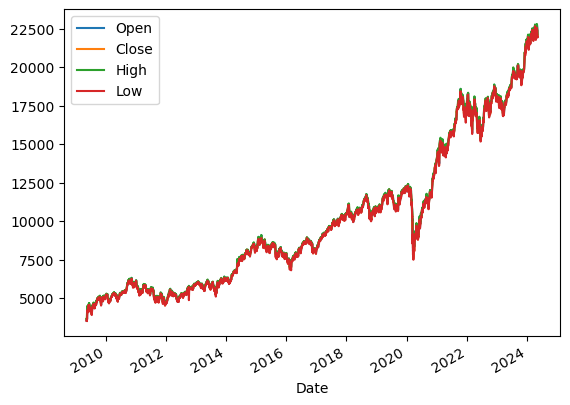

In [13]:
# Convert to DateTime
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index
df.set_index('Date', inplace=True)

# Plot time series
df[['Open', 'Close', 'High', 'Low']].plot()

<Axes: xlabel='Date'>

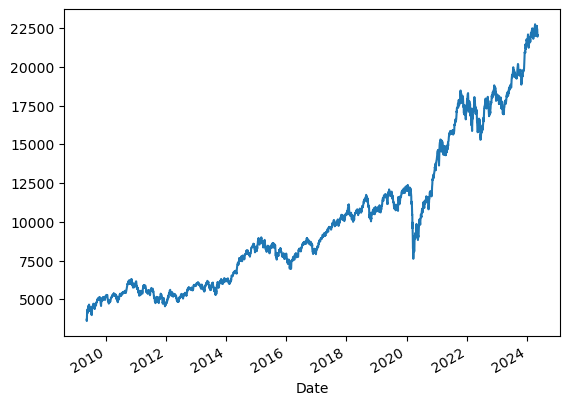

In [18]:
# Identify trends daily basis
df['Close'].rolling(window=1).mean().plot() 

<Axes: xlabel='Date'>

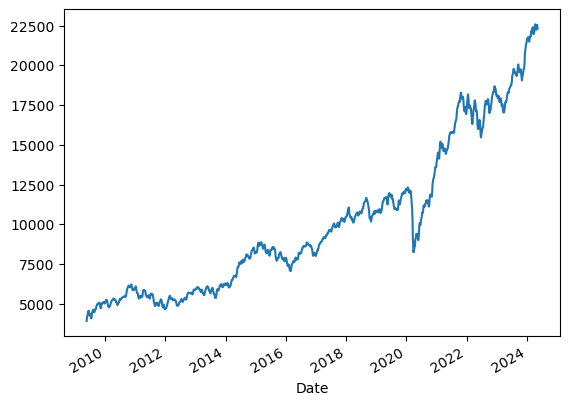

In [17]:
# Identify trends weekly basis
df['Close'].rolling(window=7).mean().plot() # 7-day moving average

<Axes: xlabel='Date'>

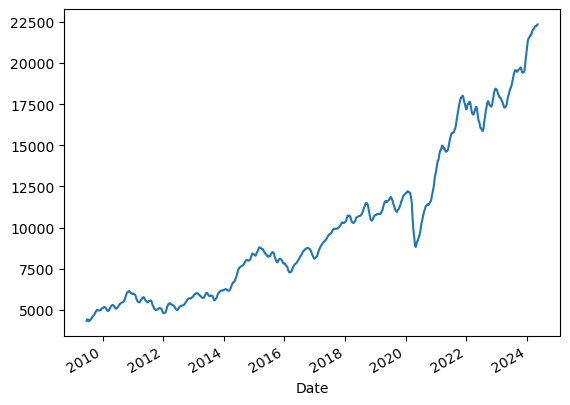

In [19]:
# Identify trends monthly basis
df['Close'].rolling(window=30).mean().plot()

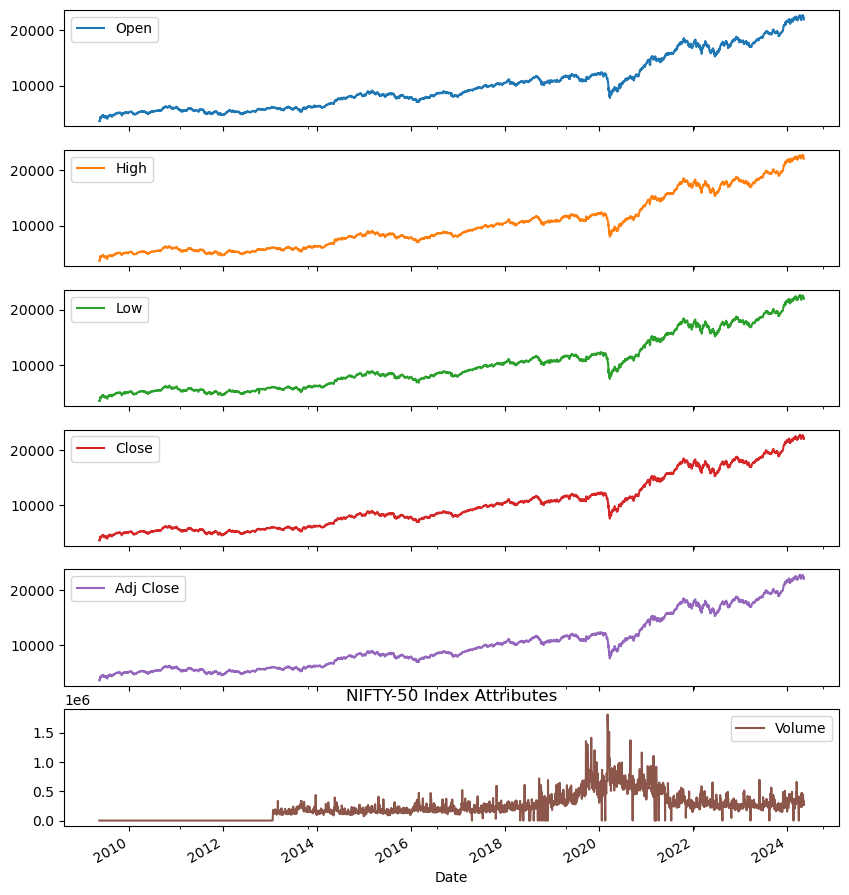

In [15]:
df.plot(subplots = True, figsize = (10,12))
plt.title('NIFTY-50 Index Attributes')
plt.show()

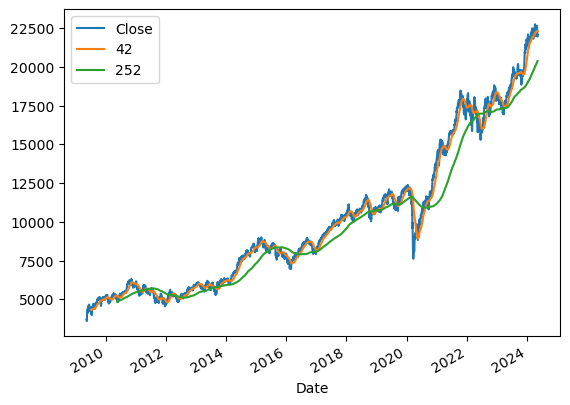

In [16]:
#Isolate the adjusted closing prices 
adj_close_px = df['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]


# Short moving window rolling mean
df['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
df['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
df[['Close', '42', '252']].plot()

plt.show()

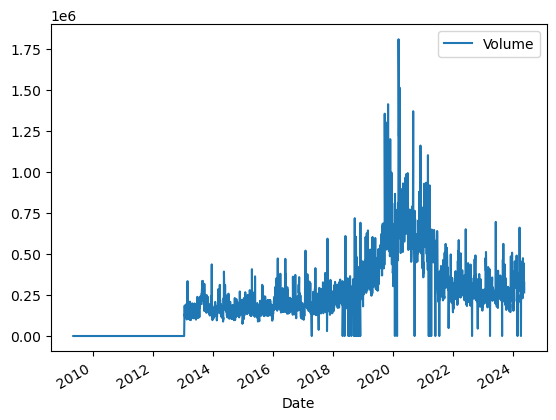

In [20]:
# Relationship between volume and price
df.plot(y='Volume', use_index=True)

# High volume days
high_volume_days = df[df['Volume'] > df['Volume'].quantile(0.95)]

In [21]:
df['daily_return'] = df['Close'].pct_change() * 100

<Axes: >

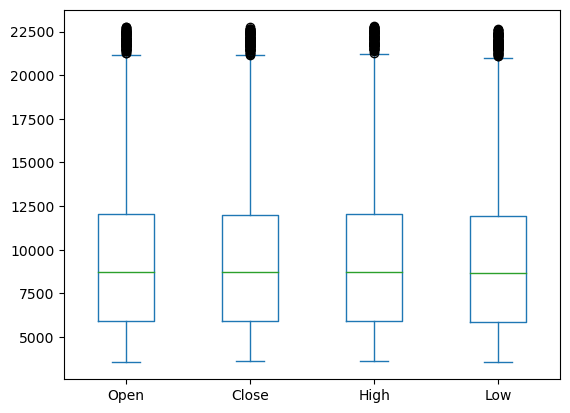

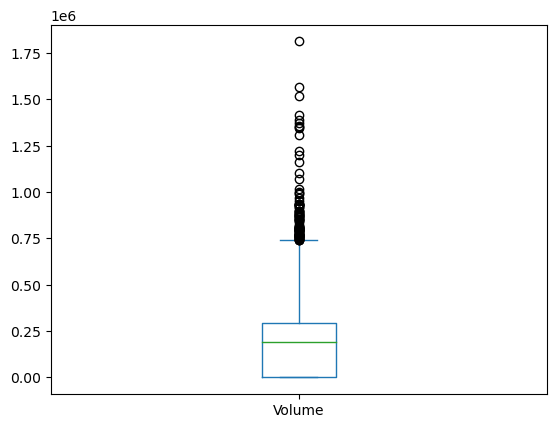

In [22]:
# Box plot
df[['Open', 'Close', 'High', 'Low']].plot(kind='box')

df[['Volume']].plot(kind='box')

Text(0.5, 1.0, 'Stock Prices Over Time')

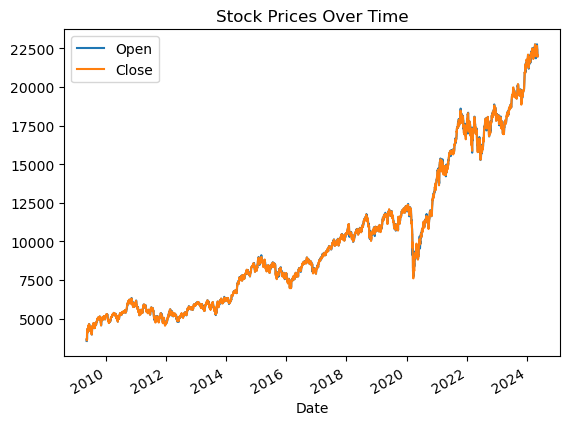

In [23]:
# Time series plot
df[['Open', 'Close']].plot()
plt.title('Stock Prices Over Time')

<Axes: xlabel='Open', ylabel='Close'>

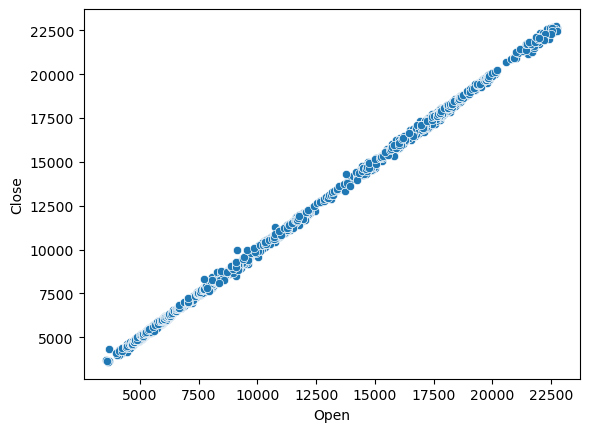

In [24]:
# Scatter plot for correlation
sns.scatterplot(data=df, x='Open', y='Close')

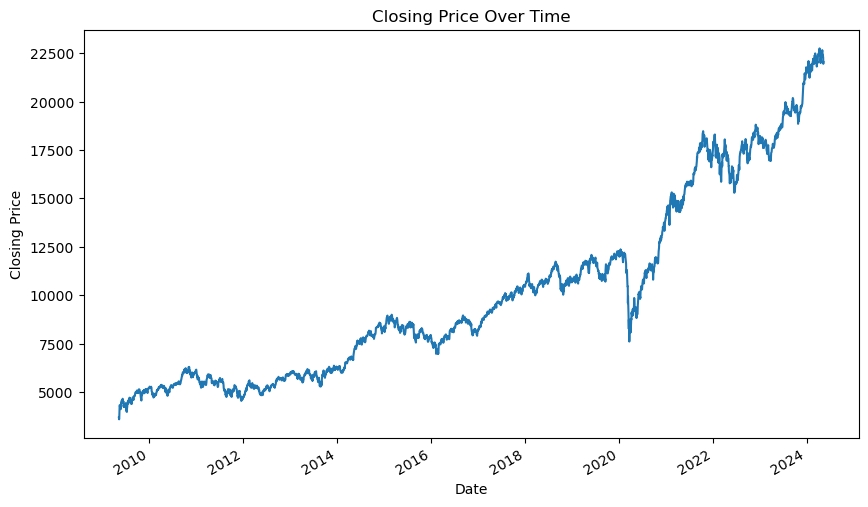

In [25]:
# Plotting closing prices
df['Close'].plot(figsize=(10, 6))
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Moving averages (MA)
Below code is for MA on a single graph using Matplotlib. This will add columns to the DataFrame for each moving average and then attempt to plot the 'Close' price along with these moving averages.

<Axes: xlabel='Date'>

<Figure size 4000x4500 with 0 Axes>

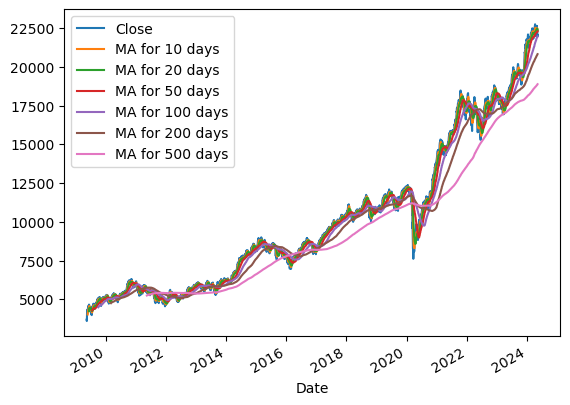

In [26]:
ma_day = [10, 20, 50, 100, 200, 500]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(ma).mean()
        

fig = plt. figure(figsize=(40,45))
df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days', 'MA for 500 days']].plot()

<Axes: xlabel='Date'>

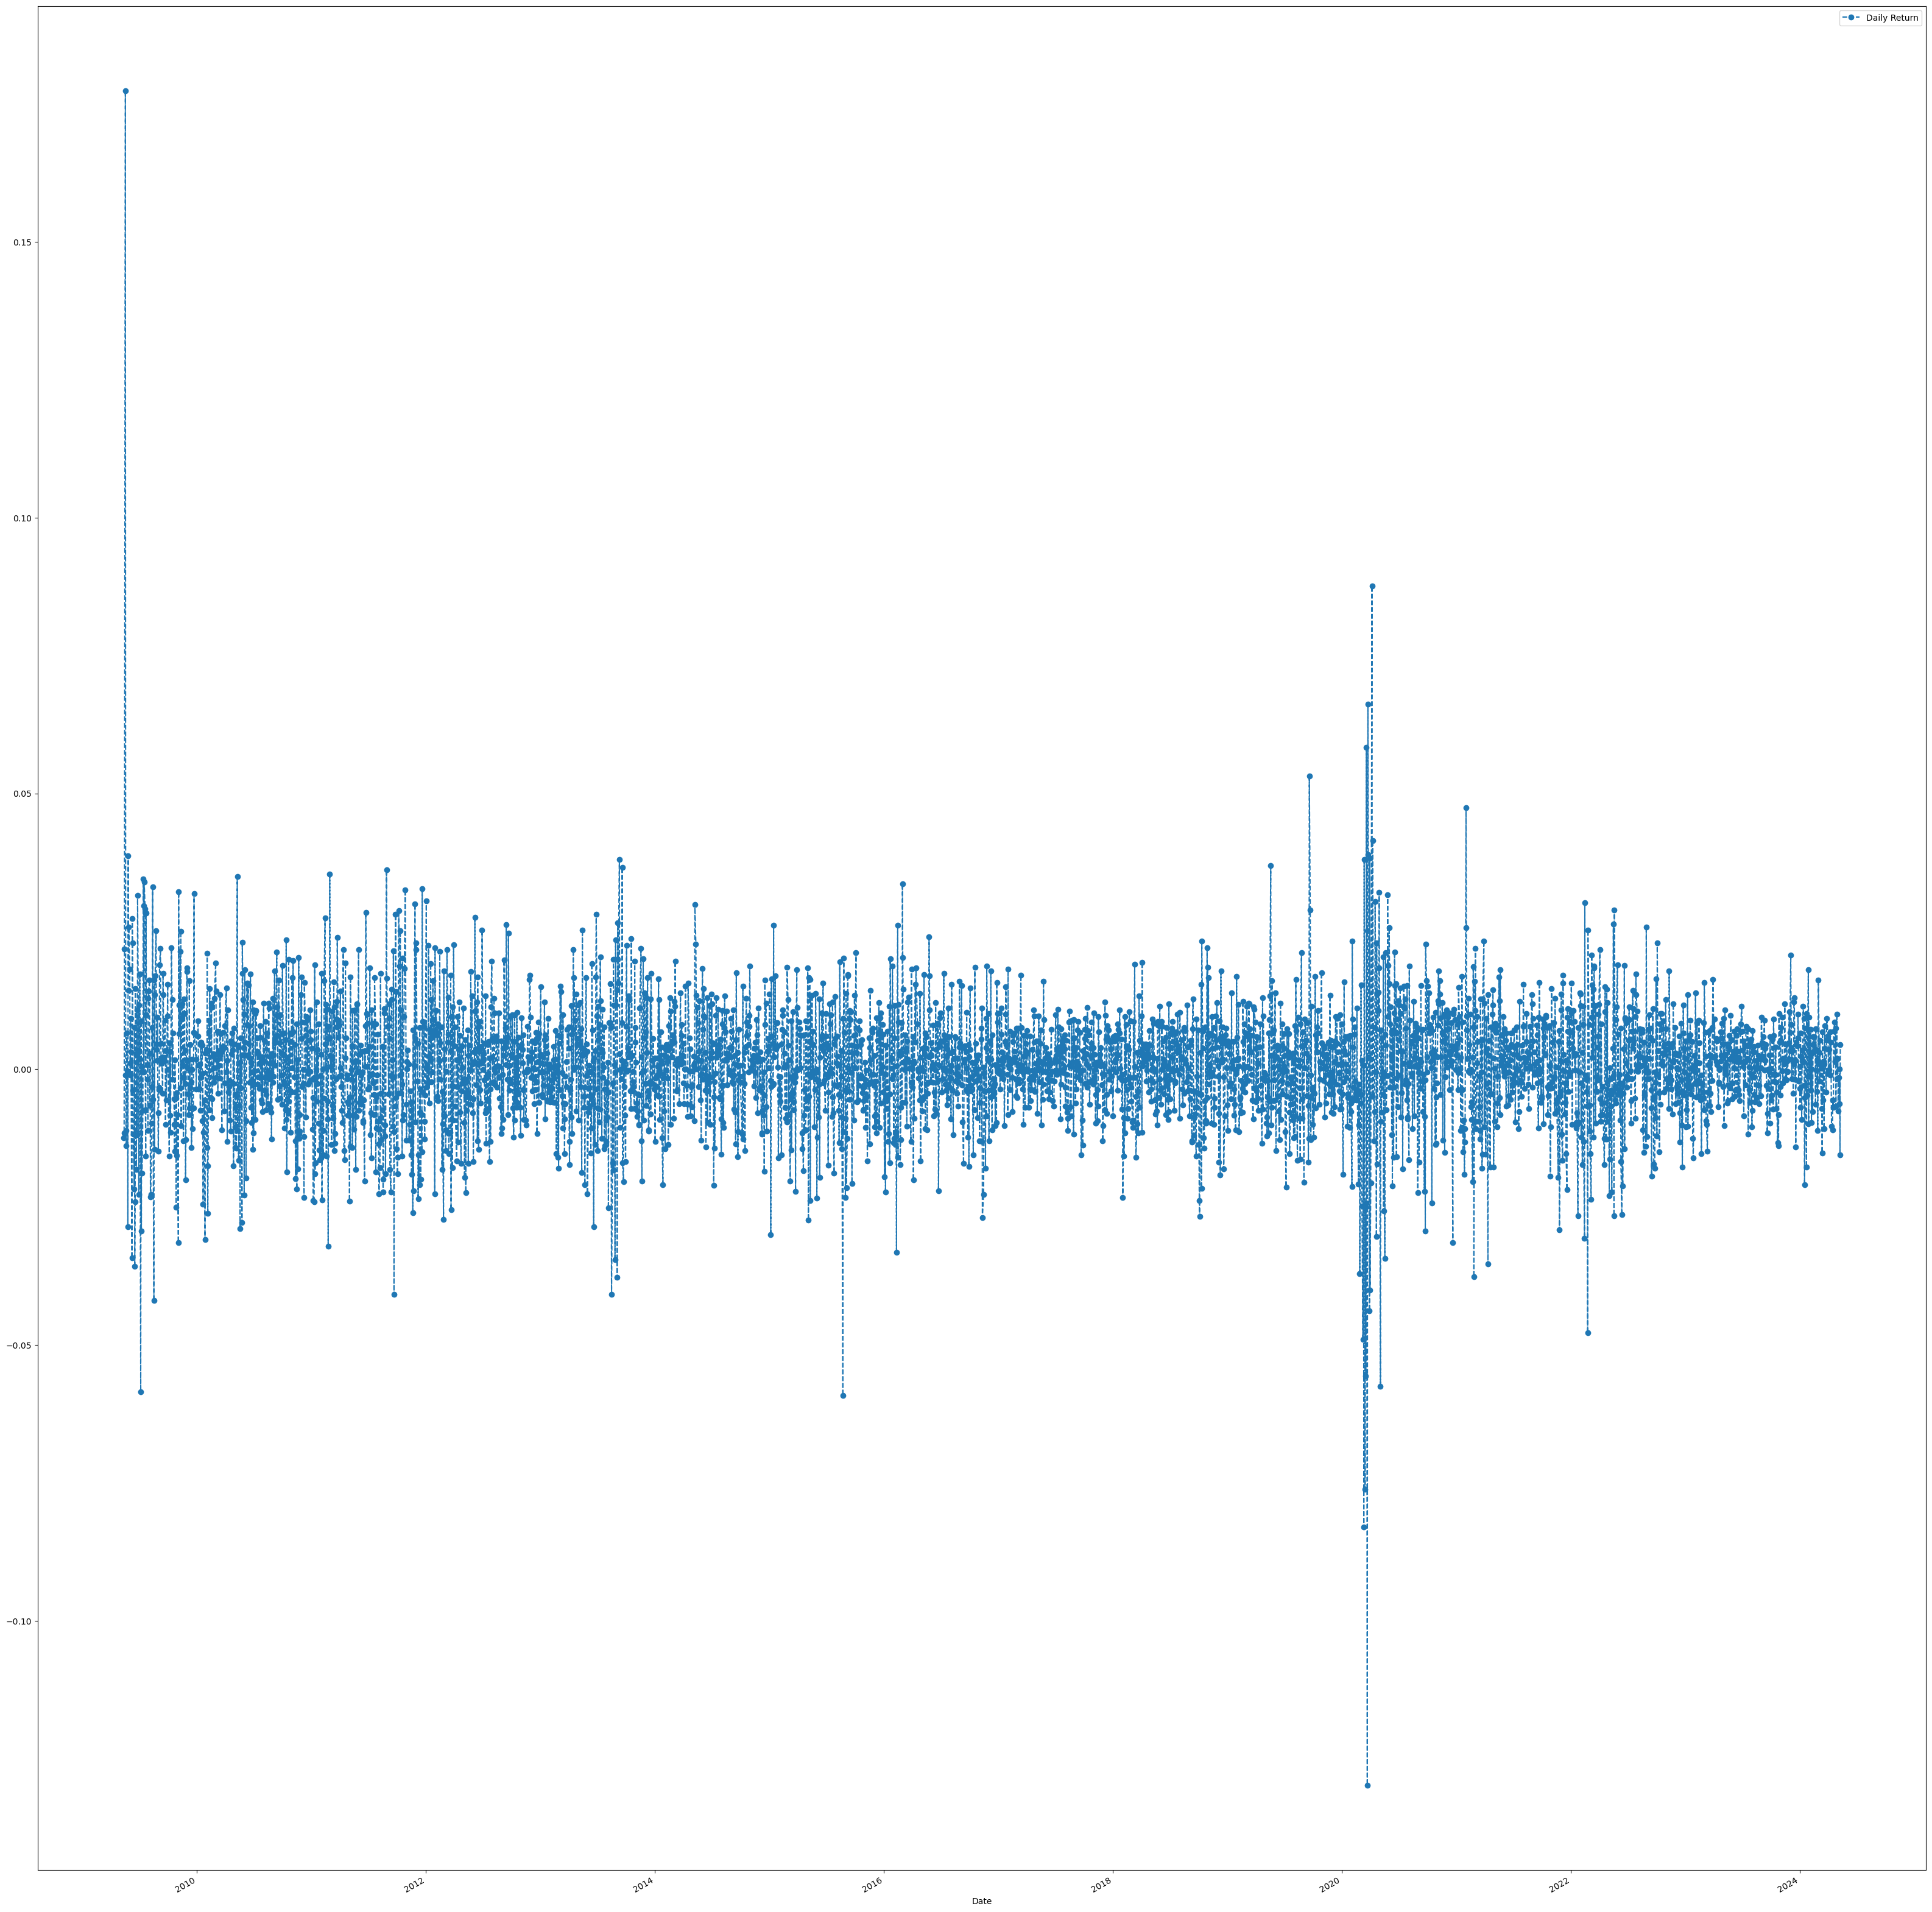

In [27]:
df['Daily Return'] = df['Close'].pct_change()
fig = plt. figure(figsize=(40,45))
df['Daily Return'].plot(legend=True, linestyle='--', marker='o')

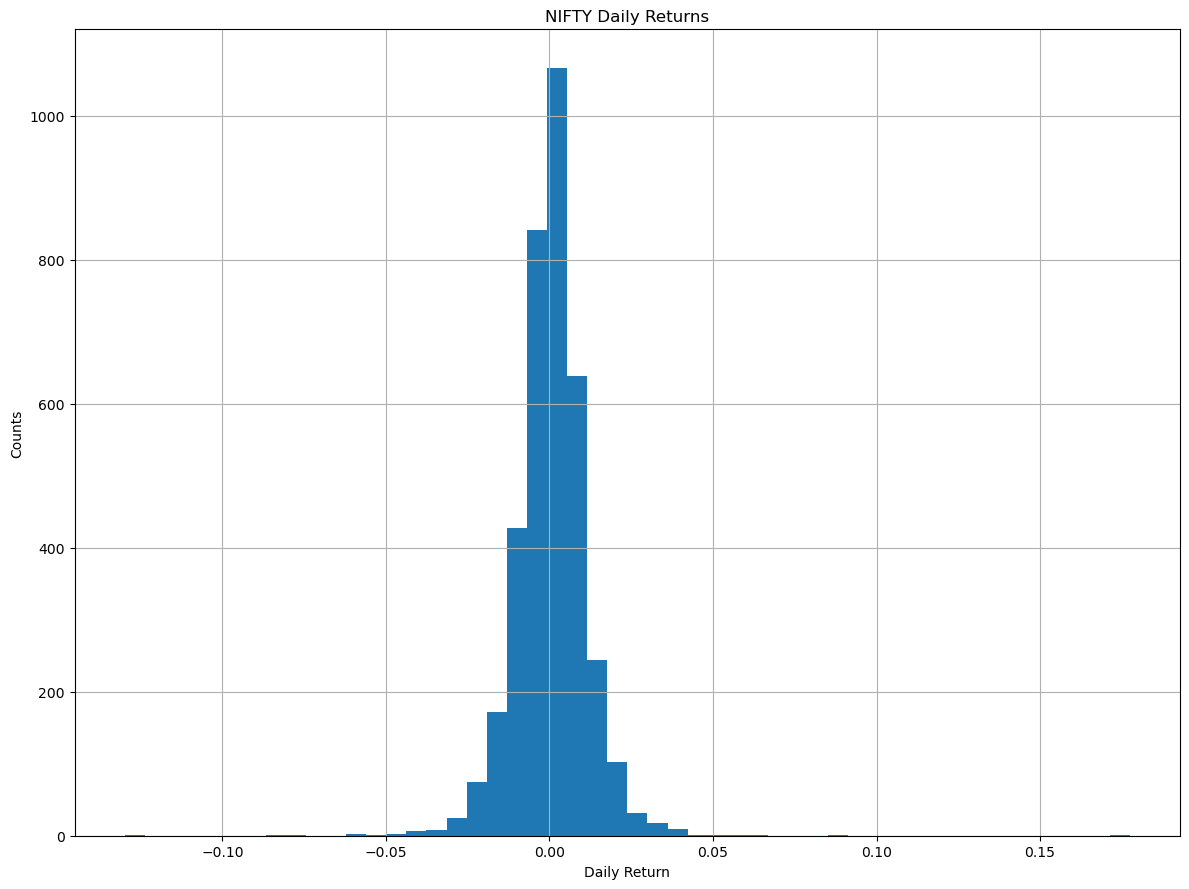

In [28]:
plt.figure(figsize=(12, 9))

df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'NIFTY Daily Returns')
    
plt.tight_layout()

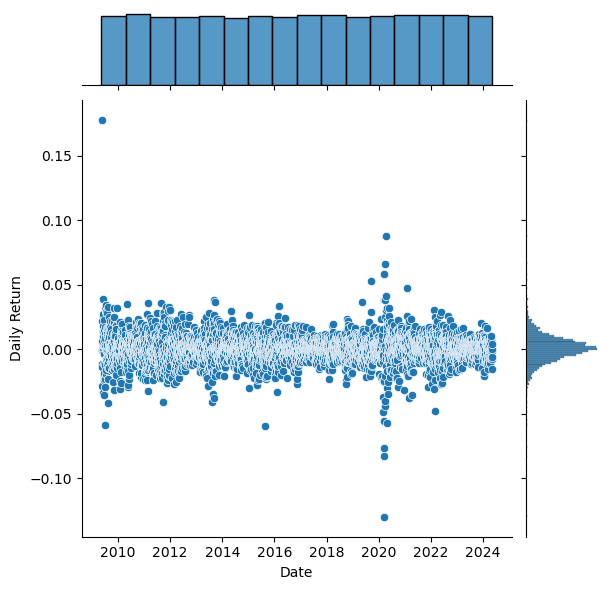

In [29]:
sns.jointplot(y='Daily Return', x='Date', data=df, kind='scatter')

<Axes: >

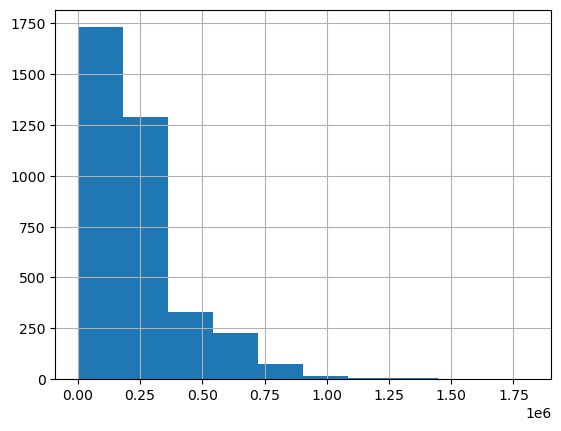

In [31]:
# Histogram
df['Volume'].hist()

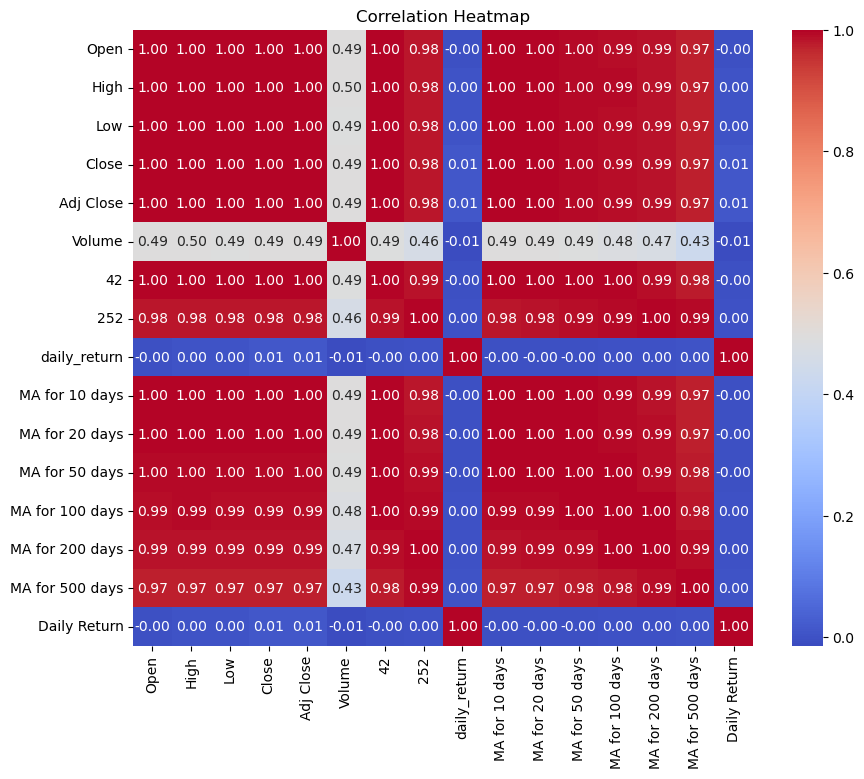

In [32]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Volatility Analysis
You can measure the level of volatility in the Nifty 50 index using various indicators such as standard deviation, average true range (ATR), or historical volatility. 

In [33]:
nifty_close_prices = df['Close']
nifty_volatility_std = nifty_close_prices.std()
print("Nifty 50 Volatility (Standard Deviation):", nifty_volatility_std)

Nifty 50 Volatility (Standard Deviation): 4792.914078455333


In [38]:
# Calculate historical volatility using standard deviation of returns
nifty_daily_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
nifty_volatility_hist = nifty_daily_returns.std() * 100  # Multiply by 100 to express in percentage
print("Nifty 50 Volatility (Historical Volatility):", nifty_volatility_hist)

Nifty 50 Volatility (Historical Volatility): 1.1284463450069584
